In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics
from numpy.random import seed
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Looking at the Pre-prossesed Data

In [2]:
df = pd.read_csv("../PhishingWebsites-ReducedAndStandardized.csv")
df

,Unnamed: 0,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f10,f11,f12,f13,f14,f15,f16,f17,f18,t
0,0,-0.432366,-1.926665,0.958237,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,...,-1.063235,-0.704374,-1.555270,-1.383683,-1.371855,-0.390849,0.419600,-1.301501,-1.291381,-1.0
1,1,0.518745,-0.341130,0.958237,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,...,-1.063235,-0.704374,-0.347097,0.722709,0.821486,-0.390849,0.419600,-0.078232,0.107014,-1.0
2,2,-0.432366,-1.133898,0.178515,0.402154,-1.486897,-0.589921,-0.603608,0.827776,-0.361705,...,0.940526,-0.704374,0.861076,0.722709,-1.371855,-0.390849,0.419600,-1.301501,0.107014,-1.0
3,3,0.518745,-0.341130,0.178515,0.402154,-1.486897,-0.589921,-2.358245,-1.208056,-0.361705,...,-1.063235,1.419700,0.861076,0.722709,-1.371855,-0.390849,0.419600,-1.301501,0.107014,-1.0
4,4,-0.432366,-0.341130,0.178515,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,...,-1.063235,-0.704374,-0.347097,0.722709,0.821486,-0.390849,0.419600,1.145038,0.107014,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11050,-2.810144,0.451637,-0.601208,0.402154,0.672542,-0.589921,1.151029,0.827776,-0.361705,...,0.940526,-0.704374,-1.555270,0.722709,0.821486,2.558530,-2.383224,1.145038,1.505410,1.0
11051,11051,-1.859033,-1.133898,1.737960,0.402154,0.672542,1.695143,-2.358245,0.827776,2.764683,...,0.940526,-0.704374,0.861076,-1.383683,-1.371855,-0.390849,-2.383224,1.145038,-1.291381,-1.0
11052,11052,0.518745,0.451637,-0.601208,0.402154,0.672542,-0.589921,-0.603608,0.827776,-0.361705,...,0.940526,-0.704374,0.861076,0.722709,-1.371855,-0.390849,0.419600,1.145038,0.107014,-1.0
11053,11053,-0.907922,0.451637,-0.601208,0.402154,0.672542,-0.589921,1.151029,-1.208056,-0.361705,...,0.940526,1.419700,0.861076,-1.383683,-1.371855,-0.390849,0.419600,-1.301501,-1.291381,-1.0


### Removing the first column

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,t
0,-0.432366,-1.926665,0.958237,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,1.463648,-1.063235,-0.704374,-1.555270,-1.383683,-1.371855,-0.390849,0.419600,-1.301501,-1.291381,-1.0
1,0.518745,-0.341130,0.958237,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,-1.154365,-1.063235,-0.704374,-0.347097,0.722709,0.821486,-0.390849,0.419600,-0.078232,0.107014,-1.0
2,-0.432366,-1.133898,0.178515,0.402154,-1.486897,-0.589921,-0.603608,0.827776,-0.361705,-1.154365,0.940526,-0.704374,0.861076,0.722709,-1.371855,-0.390849,0.419600,-1.301501,0.107014,-1.0
3,0.518745,-0.341130,0.178515,0.402154,-1.486897,-0.589921,-2.358245,-1.208056,-0.361705,0.154642,-1.063235,1.419700,0.861076,0.722709,-1.371855,-0.390849,0.419600,-1.301501,0.107014,-1.0
4,-0.432366,-0.341130,0.178515,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,0.154642,-1.063235,-0.704374,-0.347097,0.722709,0.821486,-0.390849,0.419600,1.145038,0.107014,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,-2.810144,0.451637,-0.601208,0.402154,0.672542,-0.589921,1.151029,0.827776,-0.361705,1.463648,0.940526,-0.704374,-1.555270,0.722709,0.821486,2.558530,-2.383224,1.145038,1.505410,1.0
11051,-1.859033,-1.133898,1.737960,0.402154,0.672542,1.695143,-2.358245,0.827776,2.764683,-1.154365,0.940526,-0.704374,0.861076,-1.383683,-1.371855,-0.390849,-2.383224,1.145038,-1.291381,-1.0
11052,0.518745,0.451637,-0.601208,0.402154,0.672542,-0.589921,-0.603608,0.827776,-0.361705,-1.154365,0.940526,-0.704374,0.861076,0.722709,-1.371855,-0.390849,0.419600,1.145038,0.107014,-1.0
11053,-0.907922,0.451637,-0.601208,0.402154,0.672542,-0.589921,1.151029,-1.208056,-0.361705,1.463648,0.940526,1.419700,0.861076,-1.383683,-1.371855,-0.390849,0.419600,-1.301501,-1.291381,-1.0


## Splitting Data

In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
x

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
0,-0.432366,-1.926665,0.958237,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,1.463648,-1.063235,-0.704374,-1.555270,-1.383683,-1.371855,-0.390849,0.419600,-1.301501,-1.291381
1,0.518745,-0.341130,0.958237,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,-1.154365,-1.063235,-0.704374,-0.347097,0.722709,0.821486,-0.390849,0.419600,-0.078232,0.107014
2,-0.432366,-1.133898,0.178515,0.402154,-1.486897,-0.589921,-0.603608,0.827776,-0.361705,-1.154365,0.940526,-0.704374,0.861076,0.722709,-1.371855,-0.390849,0.419600,-1.301501,0.107014
3,0.518745,-0.341130,0.178515,0.402154,-1.486897,-0.589921,-2.358245,-1.208056,-0.361705,0.154642,-1.063235,1.419700,0.861076,0.722709,-1.371855,-0.390849,0.419600,-1.301501,0.107014
4,-0.432366,-0.341130,0.178515,0.402154,-1.486897,-0.589921,1.151029,0.827776,-0.361705,0.154642,-1.063235,-0.704374,-0.347097,0.722709,0.821486,-0.390849,0.419600,1.145038,0.107014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,-2.810144,0.451637,-0.601208,0.402154,0.672542,-0.589921,1.151029,0.827776,-0.361705,1.463648,0.940526,-0.704374,-1.555270,0.722709,0.821486,2.558530,-2.383224,1.145038,1.505410
11051,-1.859033,-1.133898,1.737960,0.402154,0.672542,1.695143,-2.358245,0.827776,2.764683,-1.154365,0.940526,-0.704374,0.861076,-1.383683,-1.371855,-0.390849,-2.383224,1.145038,-1.291381
11052,0.518745,0.451637,-0.601208,0.402154,0.672542,-0.589921,-0.603608,0.827776,-0.361705,-1.154365,0.940526,-0.704374,0.861076,0.722709,-1.371855,-0.390849,0.419600,1.145038,0.107014
11053,-0.907922,0.451637,-0.601208,0.402154,0.672542,-0.589921,1.151029,-1.208056,-0.361705,1.463648,0.940526,1.419700,0.861076,-1.383683,-1.371855,-0.390849,0.419600,-1.301501,-1.291381


In [6]:
y

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4        1.0
        ... 
11050    1.0
11051   -1.0
11052   -1.0
11053   -1.0
11054   -1.0
Name: t, Length: 11055, dtype: float64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

## Looking at the Balance of the Data

In [8]:
y.value_counts()

 1.0    6157
-1.0    4898
Name: t, dtype: int64

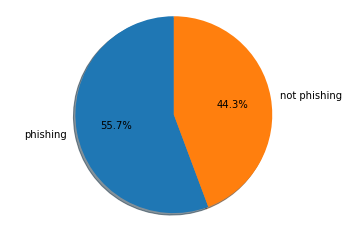

In [9]:
labels = 'phishing', 'not phishing'
sizes = y.value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As seen above, after the pre-processing of the data, the data is balanced and ready to be fed to the models.

## (1) Support Vector Machines

The first model we wil test is SVM and test all its hyperparamters.

We will test different kernels to determine the best kernel that will perform better on the data

[0.9237262586674706, 0.9451311425987338, 0.9511606873681037]


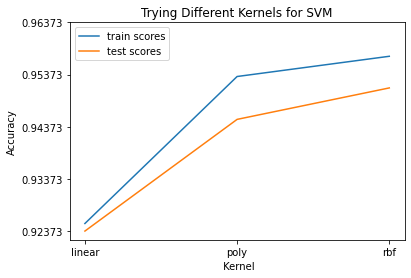

In [10]:
kernels = ['linear', 'poly', 'rbf']
scores_test = []
scores_train = []
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2).fit(x_train, y_train)
    else:
        svc = SVC(kernel=k).fit(x_train, y_train)
        
    y_pred = svc.predict(x_test)
    scores_train.append(metrics.accuracy_score(y_train, svc.predict(x_train)))
    scores_test.append(metrics.accuracy_score(y_test, y_pred))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.yticks([min(scores_test), min(scores_test)+0.01, min(scores_test)+0.02,min(scores_test)+0.03, min(scores_test)+0.04])
plt.xlabel(' Kernel')
plt.ylabel('Accuracy')
plt.title("Trying Different Kernels for SVM")
plt.legend()
plt.show()

Looking at the plot above, we will find that the RBF kernel performed best on the data

Nevertheless, we will also test the polynomial kernel on different degrees to see if it might score better than the RBF

[0.9228218269520652, 0.9258365993367501, 0.9451311425987338, 0.9475429605064818, 0.9436237564063913, 0.9137775097980102, 0.9035272836900814, 0.8510702441965632, 0.8359963822731383]


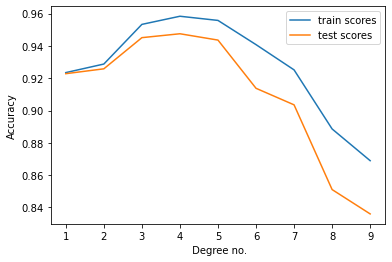

In [11]:
nums = range(1,10)
scores_test = []
scores_train = []
for i in nums:
    svc = SVC(kernel='poly', degree=i).fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    scores_train.append(metrics.accuracy_score(y_train, svc.predict(x_train)))
    scores_test.append(metrics.accuracy_score(y_test, y_pred))

print(scores_test)
plt.plot(nums, scores_train, label="train scores")
plt.plot(nums, scores_test, label="test scores")
plt.xlabel(' Degree no.')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Looking in the plot above, we will see that degree 4 performs best an it is close to the results of RBF kernel so we will be testing it seperately

Trying different C parameters on polynomial kernel degree 4:

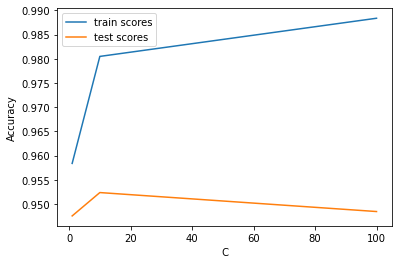

In [12]:
cs = [1, 10, 100]
scores_test = []
scores_train = []
for c in cs:
    svc = SVC(kernel='poly', C=c, degree = 4).fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    scores_train.append(metrics.accuracy_score(y_train, svc.predict(x_train)))
    scores_test.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(cs, scores_train, label="train scores")
plt.plot(cs, scores_test, label="test scores")
plt.xlabel(' C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As C increases the accuracy increases, but the testing accuracy keeps falling so we will use C = 1

Looking at the accuracies of the polynomial kernel with dgree 4 and c=100:

In [46]:
clf = SVC(kernel='poly', degree=4, C=1, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Train ACC:", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Train CM")
print(metrics.confusion_matrix(y_train, clf.predict(x_train)))
print("Train CR")
print(metrics.classification_report(y_train, clf.predict(x_train)))

print("Test ACC:", metrics.accuracy_score(y_test, clf.predict(x_test)))
print("Test CM")
print(metrics.confusion_matrix(y_test, clf.predict(x_test)))
print("Test CR")
print("Test CR:", metrics.classification_report(y_test, clf.predict(x_test)))

Train ACC: 0.9583871801499095
Train CM
[[3195  233]
 [  89 4221]]
Train CR
              precision    recall  f1-score   support

        -1.0       0.97      0.93      0.95      3428
         1.0       0.95      0.98      0.96      4310

    accuracy                           0.96      7738
   macro avg       0.96      0.96      0.96      7738
weighted avg       0.96      0.96      0.96      7738

Test ACC: 0.9475429605064818
Test CM
[[1342  128]
 [  46 1801]]
Test CR
Test CR:               precision    recall  f1-score   support

        -1.0       0.97      0.91      0.94      1470
         1.0       0.93      0.98      0.95      1847

    accuracy                           0.95      3317
   macro avg       0.95      0.94      0.95      3317
weighted avg       0.95      0.95      0.95      3317



c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


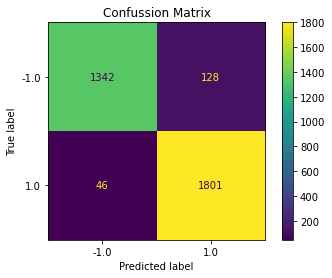

In [48]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

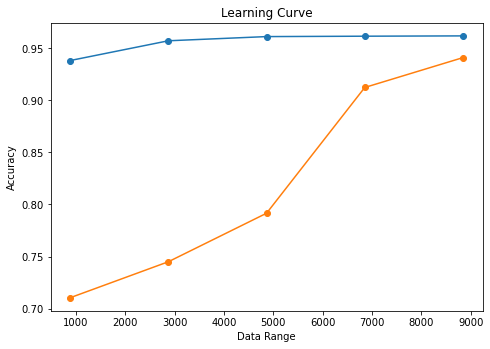

In [47]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(clf, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1))
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1))
ax.plot(train_sizes_model,train_scores_model.mean(axis=1))
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1))
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [15]:
mse, bias, var = bias_variance_decomp\
(clf, x_train.values, y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.279
Bias: 0.154
Variance: 0.124


Trying different Cs with RBF kernel:

[0.9511606873681037, 0.9632197769068436, 0.9617123907145011]


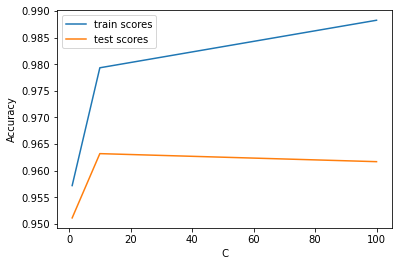

In [16]:
cs = [1, 10, 100]
scores_test = []
scores_train = []
for c in cs:
    svc = SVC(kernel='rbf', C=c).fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    scores_train.append(metrics.accuracy_score(y_train, svc.predict(x_train)))
    scores_test.append(metrics.accuracy_score(y_test, y_pred))

print(scores_test)
plt.plot(cs, scores_train, label="train scores")
plt.plot(cs, scores_test, label="test scores")
plt.xlabel(' C')
plt.ylabel('Accuracy')
#plt.yticks([min(scores_train), min(scores_train)+0.02, min(scores_train)+0.04])
#plt.xticks([1, 10, 100, 1000])
plt.legend()
plt.show()

As C increases the training accuracy increases, but the testing accuracy keeps falling so we will use C = 1

In [54]:
svc = SVC(kernel='rbf', C=1, random_state=42)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
# generate evaluation metrics
print("Train ACC:", metrics.accuracy_score(y_train, svc.predict(x_train)))
print("Train CM")
print(metrics.confusion_matrix(y_train, svc.predict(x_train)))
print("Train CR")
print(metrics.classification_report(y_train, svc.predict(x_train)))

print("Test ACC:", metrics.accuracy_score(y_test, svc.predict(x_test)))
print("Test CM")
print("Test CM:",metrics.confusion_matrix(y_test, svc.predict(x_test)))
print("Test CR")
print(metrics.classification_report(y_test, svc.predict(x_test)))

Train ACC: 0.9572240889118635
Train CM
[[3218  210]
 [ 121 4189]]
Train CR
              precision    recall  f1-score   support

        -1.0       0.96      0.94      0.95      3428
         1.0       0.95      0.97      0.96      4310

    accuracy                           0.96      7738
   macro avg       0.96      0.96      0.96      7738
weighted avg       0.96      0.96      0.96      7738

Test ACC: 0.9511606873681037
Test CM
Test CM: [[1363  107]
 [  55 1792]]
Test CR
              precision    recall  f1-score   support

        -1.0       0.96      0.93      0.94      1470
         1.0       0.94      0.97      0.96      1847

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



As seen above, the model's recall and precision for both classes is high which means that the model mostly predicts a good portion of data correctly and gets alot of True postives. This reflects in the F1 score as it is is high for both classes.

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


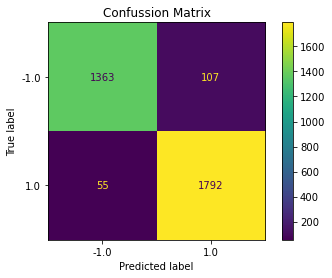

In [51]:
plot_confusion_matrix(svc, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

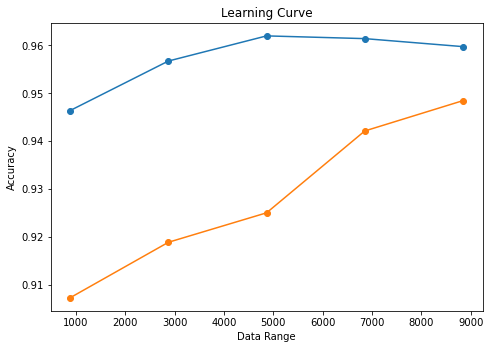

In [52]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(svc, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1))
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1))
ax.plot(train_sizes_model,train_scores_model.mean(axis=1))
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1))

ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

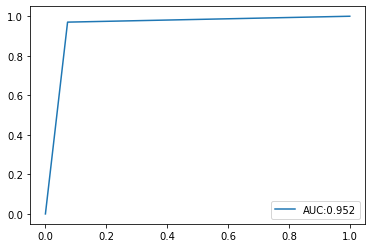

In [55]:
auc = roc_auc_score(y_pred, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,label ='AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

THe ROC curve came out with AUC 0.95

In [21]:
mse, bias, var = bias_variance_decomp\
(svc, x_train.values, y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.187
Bias: 0.113
Variance: 0.074


looking at the bias and variance of the model, it is seen that both of them are low which indicates the high generalization of the model.

### Comparing RBF and polynomail kernel at degree 4

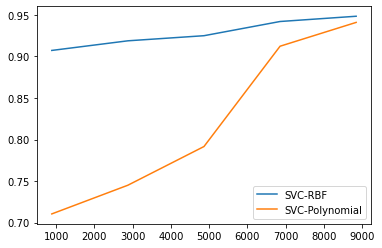

In [53]:
classifiers = [ SVC(kernel='rbf', C=1, random_state=42),
                SVC(kernel='poly',degree=4, C=1, random_state=42),
            ]
classifiers_names = ['SVC-RBF', 'SVC-Polynomial']
for i,classifier in enumerate(classifiers):
    (train_sizes,
     train_scores,
     test_scores) = learning_curve(classifier, x, y, cv=5)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, test_mean, label = classifiers_names[i])
#plt.yticks([min(test_mean), min(test_mean)+0.02, min(test_mean)+0.04, min(test_mean)+0.06,min(test_mean)+0.08])

plt.legend()
plt.show()

As seen in both models, the results either the accuracy, MSE, bias and variance are close. The polynnomial kernel had a slight higher accuracy but the MSE of the RBF and its variance were lower.

## (2) Decision Trees

[0.8866445583358457, 0.9071450105517034, 0.9083509195055773, 0.9231233041905336, 0.9270425082906241, 0.9321676213445885, 0.934880916490805, 0.9384986433524269, 0.9412119384986434, 0.9526680735604461, 0.9499547784142297, 0.9577931866144106, 0.9553813687066627, 0.9638227313837805, 0.9626168224299065, 0.9602050045221586, 0.9614109134760326, 0.9632197769068436, 0.9620138679529695, 0.9617123907145011]


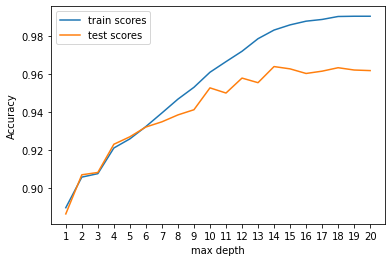

In [23]:
depths = range(1,21)
scores_test = []
scores_train = []
for depth in depths:

    tree = DecisionTreeClassifier(random_state=42, max_depth=depth)
    tree.fit(x_train, y_train)
    y_pred_dt = tree.predict(x_test)
    scores_train.append(metrics.accuracy_score(y_train, tree.predict(x_train)))
    scores_test.append(metrics.accuracy_score(y_test, y_pred_dt))
    
print(scores_test)
plt.plot(depths, scores_train, label="train scores")
plt.plot(depths, scores_test, label="test scores")
plt.xticks(depths)
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As seen above, At depth 10, the  results are adquate becuase as the depth increases afar from that, the testing accuracy begins to fall.

In [56]:
tree = DecisionTreeClassifier(random_state=42, max_depth=10)
tree.fit(x_train, y_train)
y_pred_dt = tree.predict(x_test)
print("Train ACC:", metrics.accuracy_score(y_train, tree.predict(x_train)))
print("Train CM")
print(metrics.confusion_matrix(y_train, tree.predict(x_train)))
print("Train CR")
print(metrics.classification_report(y_train, tree.predict(x_train)))

print("Test ACC:", metrics.accuracy_score(y_test, tree.predict(x_test)))
print("Test CM")
print(metrics.confusion_matrix(y_test, tree.predict(x_test)))
print("Test CR")
print(metrics.classification_report(y_test, tree.predict(x_test)))

Train ACC: 0.9608425949857844
Train CM
[[3309  119]
 [ 184 4126]]
Train CR
              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96      3428
         1.0       0.97      0.96      0.96      4310

    accuracy                           0.96      7738
   macro avg       0.96      0.96      0.96      7738
weighted avg       0.96      0.96      0.96      7738

Test ACC: 0.9526680735604461
Test CM
[[1395   75]
 [  82 1765]]
Test CR
              precision    recall  f1-score   support

        -1.0       0.94      0.95      0.95      1470
         1.0       0.96      0.96      0.96      1847

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



As seen above, the model's recall and precision for both classes is high which means that the model mostly predicts a good portion of data correctly and gets alof of True postives. THis reflects in the F1 score as it is is high for both classes.

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


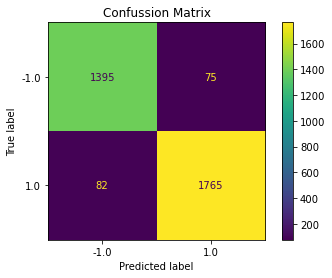

In [57]:
plot_confusion_matrix(tree, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

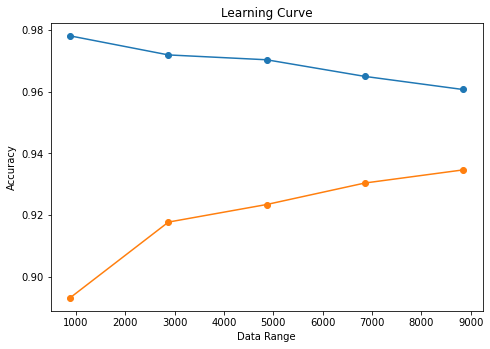

In [58]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(tree, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1))
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1))
ax.plot(train_sizes_model,train_scores_model.mean(axis=1))
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1))
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

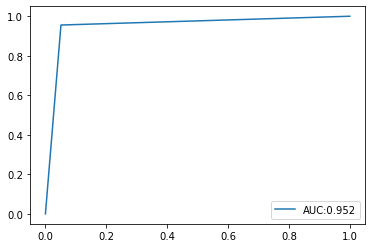

In [59]:
auc = roc_auc_score(y_pred_dt, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr,label ='AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

The ROC curve came out with AUC 0.95

In [28]:
mse, bias, var = bias_variance_decomp\
(tree, x_train.values, y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.211
Bias: 0.102
Variance: 0.109


looking at the bias and variance of the model, it is seen that both of them are somiehow low which indicates the good generalization of the model.

## (3) Logistic Regression

As suggested by the logistic regression documnetation,  'liblinear' is a good choice for small datasets, whereas 'sag' and 'saga' are faster for large ones. For multiclass problems, only 'newton-cag', 'sag', 'saga' and 'lbfgs' handle multinomial loss.

[0.9164908049442267, 0.9234247814290021, 0.9258365993367501, 0.9261380765752185]
[0.9229775135693977, 0.9263375549237529, 0.9282760403204963, 0.9276298785215819]


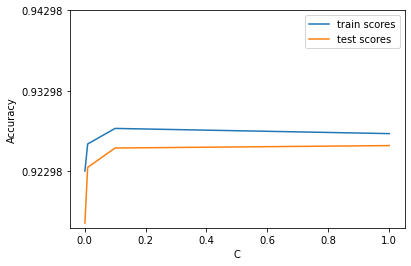

In [39]:
scores_test = []
scores_train = []
cs=[0.001,0.01, 0.1, 1]
for c in cs:
    model = LogisticRegression(random_state=42, solver = 'liblinear', C=c)
    model = model.fit(x_train, y_train)
    y_pred_lr = model.predict(x_test)
    scores_train.append(metrics.accuracy_score(y_train, model.predict(x_train)))
    scores_test.append(metrics.accuracy_score(y_test, y_pred_lr))

print(scores_test)
print(scores_train)

plt.plot(cs, scores_train, label="train scores")
plt.plot(cs, scores_test, label="test scores")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.yticks([min(scores_train), min(scores_train)+0.01, min(scores_train)+0.02])
#plt.xticks([0.001,0.01, 0.1, 1])
plt.legend()
plt.show()

In [41]:
model = LogisticRegression(random_state=42, solver = 'liblinear', C=1)
model = model.fit(x_train, y_train)
y_pred_lr = model.predict(x_test)

print("Train ACC:", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Train CM")
print(metrics.confusion_matrix(y_train, model.predict(x_train)))
print("Train CR")
print(metrics.classification_report(y_train, model.predict(x_train)))

print("Test ACC:", metrics.accuracy_score(y_test, model.predict(x_test)))
print("Test CM")
print(metrics.confusion_matrix(y_test, model.predict(x_test)))
print("Test CR")
print(metrics.classification_report(y_test, model.predict(x_test)))

Train ACC: 0.9276298785215819
Train CM
[[3095  333]
 [ 227 4083]]
Train CR
              precision    recall  f1-score   support

        -1.0       0.93      0.90      0.92      3428
         1.0       0.92      0.95      0.94      4310

    accuracy                           0.93      7738
   macro avg       0.93      0.93      0.93      7738
weighted avg       0.93      0.93      0.93      7738

Test ACC: 0.9261380765752185
Test CM
[[1331  139]
 [ 106 1741]]
Test CR
              precision    recall  f1-score   support

        -1.0       0.93      0.91      0.92      1470
         1.0       0.93      0.94      0.93      1847

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.93      0.93      0.93      3317



As seen above, the model's recall and precision for both classes is high which means that the model mostly predicts a good portion of data correctly and gets alof of True postives. This reflects in the F1 score as it is is high for both classes. Nevertheless, it is noticed that the other two models got higher results than the logistic regression model. 

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


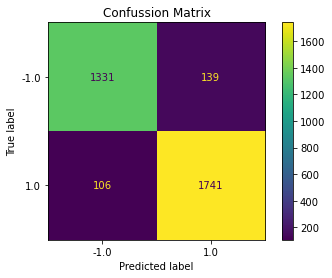

In [31]:
plot_confusion_matrix(model, x_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

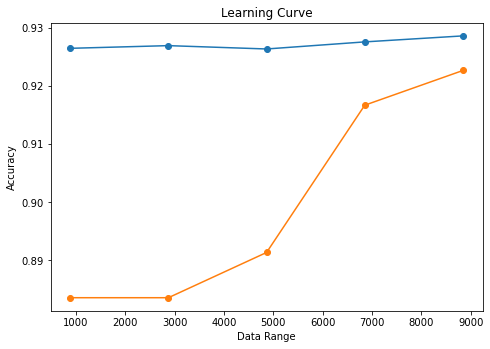

In [32]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(model, x, y,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1))
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1))
ax.plot(train_sizes_model,train_scores_model.mean(axis=1))
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1))
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

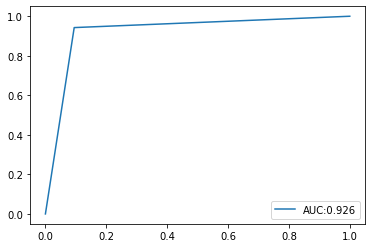

In [33]:
auc = roc_auc_score(y_pred_lr, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr,label ='AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

The ROC curve came out with AUC 0.92

In [34]:
mse, bias, var = bias_variance_decomp\
(model, x_train.values, y_train.values, x_test.values, y_test.values, loss='mse', num_rounds=20, random_seed=42)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.294
Bias: 0.276
Variance: 0.018


looking at the bias and variance of the model, it is seen that both of them are somehow low which indicates the good generalization of the model. Notice that the bias and variance of the Logisitc regression is higher than both the decision trees and SVM although not by much.

## Final Analysis

As seen above the best SVM was the one with parameters of the RBF kernel and C = 100, the best Decision tree model was the one with parameters of maximum depth of 10, and the best logistic regression was the one with parameters of the liblinear solver and C = 1. So we will be comparing between the three models to identify the best out of them and to recommend how each one will be used in which kind of ensemble.

In [35]:
classifiers = [ SVC(kernel='rbf', C=1, random_state=42),
                DecisionTreeClassifier(random_state=42, max_depth=10),
                LogisticRegression(random_state=42, solver = 'liblinear', C=1)
            ]

### Comparing Learning Curves

Plotting the three learning curves on the test data:

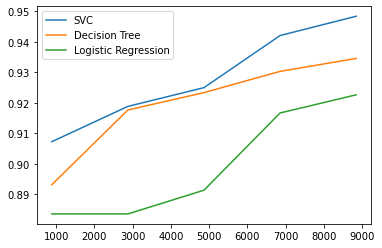

In [36]:
classifiers_names = ['SVC', 'Decision Tree', 'Logistic Regression']
for i,classifier in enumerate(classifiers):
    (train_sizes,
     train_scores,
     test_scores) = learning_curve(classifier, x, y, cv=5)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, test_mean, label = classifiers_names[i])
#plt.yticks([min(test_mean), min(test_mean)+0.02, min(test_mean)+0.04, min(test_mean)+0.06,min(test_mean)+0.08])

plt.legend()
plt.show()

As seen above,The SVC has the highest score among the three models. The decision trees weren't far behind the SVC. yet, the logistic regression was lagging behind and not performing as well as the other two. THe logistic regression at first was performing badly until the size of the data increased. This may indicate that the Logistic regression might need a much bigger amount of data to perform well unlike the other two who scored better on the available dataset.

### Comparing ROC curves

Plotting the three roc curves below:

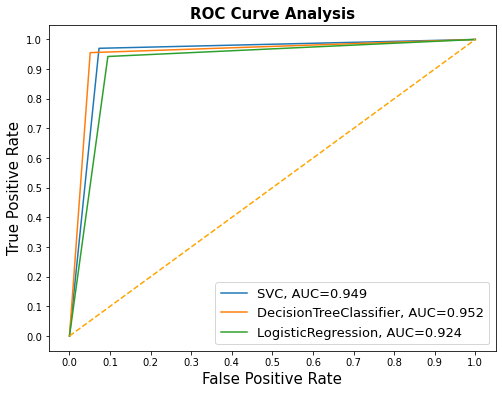

In [37]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict(x_test)
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


As seen above, Decision trees had the highest AUC altough the SVC's wasn't far from it. 

## Final Comment

All three models were close in results. Decision trees had the highest accuracy among the three models while the SVM had the lowest bias and variance. After comparing the three models it is seen that the Logistic regression is the lowest among them and shouldn't be first choice to form the ensembles with it. Therefore, we will be constructing an ensemble of decision trees, random forest, ensemble of the three different model, and an ensemb. Then, we will compare the results of the three ensembles and analyse them.

Note: we did not implement KNNs since it will be computationally expensive on applying it in ensemble models.